In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from heapq import nlargest

sid = SentimentIntensityAnalyzer()
lemma = WordNetLemmatizer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rohin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/rohin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rohin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rohin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rohin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# given path to data file, get sentiment score for the combined title and body
def get_sentiment(filepath):
    df = pd.read_csv(filepath)
    
    df["full_text"] = df["title"] + " " + df["selftext"]
    df["sent_score"] = df["full_text"].apply(lambda review: sid.polarity_scores(review))
    df["compound"] = df["sent_score"].apply(lambda score_dict: score_dict["compound"])
    df["sentiment"] = df["compound"].apply(lambda c: "pos" if c > 0 else ("neu" if c == 0 else "neg"))
    
    return df

In [3]:
bostonU = get_sentiment("data/private/BostonU/BostonU_all_time.csv")
bostonU.head()

,id,url,title,score,num_comments,created_utc,selftext,full_text,sent_score,compound,sentiment
0,5lktn4,https://www.reddit.com/r/BostonU/comments/5lkt...,Admission Questions and Answers,18,16,2017-01-02 03:26:23,Stickied thread for general admission question...,Admission Questions and Answers Stickied threa...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.7506,pos
1,5nytp4,https://www.reddit.com/r/BostonU/comments/5nyt...,Hey Terrier Sports Fans,13,0,2017-01-14 10:17:47,"With the second semester starting, and ""Trophy...",Hey Terrier Sports Fans With the second semest...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2,5q7f2s,https://www.reddit.com/r/BostonU/comments/5q7f...,Boston University Paintball?,12,3,2017-01-25 17:30:43,"Hey BU,\n\nI'm a current freshman here at BU a...","Boston University Paintball? Hey BU,\n\nI'm a ...","{'neg': 0.011, 'neu': 0.884, 'pos': 0.105, 'co...",0.9273,pos
3,5t8gdq,https://www.reddit.com/r/BostonU/comments/5t8g...,Warren towers garage smells like weed all the ...,17,9,2017-02-10 09:04:09,Anyone ever notice that as you go up the escal...,Warren towers garage smells like weed all the ...,"{'neg': 0.033, 'neu': 0.841, 'pos': 0.125, 'co...",0.7882,pos
4,5ui3v9,https://www.reddit.com/r/BostonU/comments/5ui3...,People with Laptops taking up computers in the...,12,6,2017-02-16 13:46:24,Can we stop this? If you already have a laptop...,People with Laptops taking up computers in the...,"{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'comp...",-0.4588,neg


In [4]:
georgetown = get_sentiment("data/private/georgetown/georgetown_all_time.csv")
brown = get_sentiment("data/private/BrownU/BrownU_all_time.csv")
harvard = get_sentiment("data/private/Harvard/Harvard_all_time.csv")
upenn = get_sentiment("data/private/UPenn/UPenn_all_time.csv")
usc = get_sentiment("data/private/USC/USC_all_time.csv")
syracuse = get_sentiment("data/private/Syracuse/Syracuse_all_time.csv")
columbia = get_sentiment("data/private/columbia/columbia_all_time.csv")
mit = get_sentiment("data/private/mit/mit_all_time.csv")
notredame = get_sentiment("data/private/notredame/notredame_all_time.csv")
stanford = get_sentiment("data/private/stanford/stanford_all_time.csv")
yale = get_sentiment("data/private/yale/yale_all_time.csv")

In [5]:
stop_words = list(stopwords.words('english'))
stop_words = stop_words + ["'m", "n't", "'s", "'re"] # add more common stop words
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
# get word frequency given a DataFrame
def get_word_frequency(df):
    df["text_token"] = df["full_text"].apply(word_tokenize)
    df["text_stop"] = df["text_token"].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    df["text_stem"] = df["text_stop"].apply(lambda x: [lemma.lemmatize(word) for word in x])
    
    text = df["text_stem"].apply(pd.Series).stack()
    
    fdist = FreqDist(text)
    for punc in string.punctuation:
        del fdist[punc]
    
    del fdist["’"]
        
    return fdist

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
bostonU_freq = get_word_frequency(bostonU)

# get 50 most frequently used words
top = nlargest(50, bostonU_freq, key = bostonU_freq.get)
top

['BU',
 'like',
 'class',
 'student',
 'get',
 'know',
 'would',
 'anyone',
 'people',
 'one',
 'year',
 'campus',
 'semester',
 'time',
 'really',
 'want',
 'go',
 'work',
 'take',
 'make',
 'amp',
 'going',
 'http',
 '--',
 'friend',
 'school',
 'good',
 'got',
 'wondering',
 'much',
 'need',
 'help',
 'feel',
 'back',
 'day',
 'think',
 'even',
 '``',
 "''",
 'thing',
 'still',
 'way',
 'also',
 'email',
 'see',
 'Boston',
 'getting',
 'professor',
 'sure',
 'course']

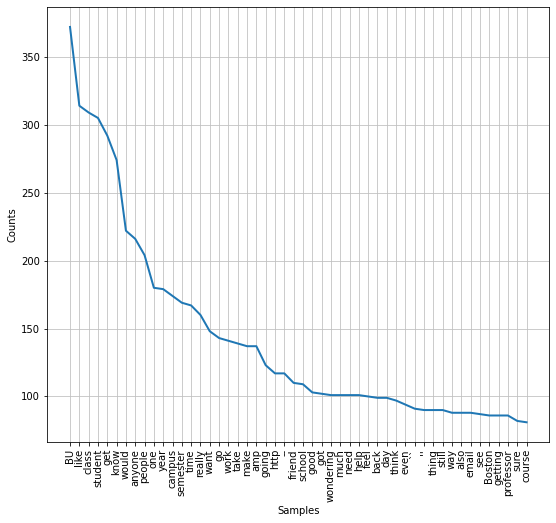

In [9]:
plt.figure(figsize=(9,8))
bostonU_freq.plot(50, cumulative=False);